# 1997 ~ 2018 KBO 타자 데이터를 이용한 연봉 예측 ver.3

-------------------------

In [92]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

mpl.rc('font', family='NanumGothic')  # matplotlib에서 한글 폰트로 NanumGothic을 사용
mpl.rcParams['axes.unicode_minus'] = False

## 1. 데이터 불러오기

In [4]:
batter = pd.read_csv('./KBO_1997_2020_Salary_Next_EN.csv')
batter.head()

,No,Name,Year,Team,Position,G,PA,AB,R,H,...,AVG,OBP,SLG,OPS,wOBA,wRC+,WAR,WPA,Salary,NextSalary
0,NaN,가득염,2007,S,P,4,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,"8,000","11,000"
1,106.0,강경학,2014,한,SS,41,103,86,11,19,...,0.221,0.337,0.349,0.686,0.316,65.6,0.21,-0.11,"2,400","6,500"
2,123.0,강경학,2015,한,SS,120,376,311,50,80,...,0.257,0.348,0.325,0.673,0.304,66.4,0.11,-0.32,"6,500","6,500"
3,370.0,강경학,2016,한,SS,46,116,101,16,16,...,0.158,0.232,0.257,0.490,0.223,10.5,-0.69,-1.10,"6,500","6,200"
4,315.0,강경학,2017,한,2B,59,93,84,17,18,...,0.214,0.290,0.262,0.552,0.264,44.1,-0.18,-0.81,"6,200","5,800"


In [5]:
print(batter.shape)

(2868, 34)


In [6]:
# 문자로 저장되어있는 컬럼(Salary)을 숫자로 변경
batter['Salary'] = batter['Salary'].str.replace(',', '')
batter['NextSalary'] = batter['NextSalary'].str.replace(',', '')
batter = batter.astype({'Salary': int, 'NextSalary': int})

batter['Salary'].describe()
batter['NextSalary'].describe()

count      2868.000000
mean      13716.115760
std       18479.589008
min           0.000000
25%        3700.000000
50%        7000.000000
75%       15000.000000
max      250000.000000
Name: NextSalary, dtype: float64

In [7]:
batter.head()

,No,Name,Year,Team,Position,G,PA,AB,R,H,...,AVG,OBP,SLG,OPS,wOBA,wRC+,WAR,WPA,Salary,NextSalary
0,NaN,가득염,2007,S,P,4,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,8000,11000
1,106.0,강경학,2014,한,SS,41,103,86,11,19,...,0.221,0.337,0.349,0.686,0.316,65.6,0.21,-0.11,2400,6500
2,123.0,강경학,2015,한,SS,120,376,311,50,80,...,0.257,0.348,0.325,0.673,0.304,66.4,0.11,-0.32,6500,6500
3,370.0,강경학,2016,한,SS,46,116,101,16,16,...,0.158,0.232,0.257,0.490,0.223,10.5,-0.69,-1.10,6500,6200
4,315.0,강경학,2017,한,2B,59,93,84,17,18,...,0.214,0.290,0.262,0.552,0.264,44.1,-0.18,-0.81,6200,5800


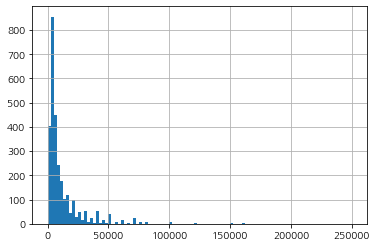

In [8]:
batter['Salary'].hist(bins=100)

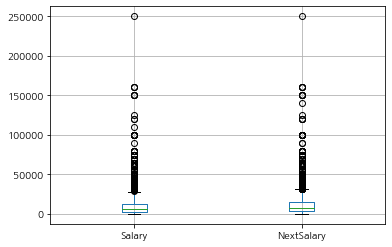

In [9]:
batter.boxplot(column=['Salary', 'NextSalary'])

------

## 2. 데이터 전처리

In [10]:
batter.columns

Index(['No', 'Name', 'Year', 'Team', 'Position', 'G', 'PA', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'IBB', 'SO',
       'GDP', 'SAC', 'SF', 'AVG', 'OBP', 'SLG', 'OPS', 'wOBA', 'wRC+', 'WAR',
       'WPA', 'Salary', 'NextSalary'],
      dtype='object')

### 손실 데이터 처리

In [11]:
batter = batter.fillna(0)

### 분석에 사용할 특성 선정

먼저, 선수들의 stat만 이용해서 회귀 분석할 것이기 때문에, stat 관련 특성만 남긴다.

In [12]:
batter_df = batter.drop(['No', 'Name', 'Team'], axis=1)
batter_df.columns

Index(['Year', 'Position', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'TB',
       'RBI', 'SB', 'CS', 'BB', 'HBP', 'IBB', 'SO', 'GDP', 'SAC', 'SF', 'AVG',
       'OBP', 'SLG', 'OPS', 'wOBA', 'wRC+', 'WAR', 'WPA', 'Salary',
       'NextSalary'],
      dtype='object')

### 범주형 데이터 수치화

In [13]:
batter_df = pd.get_dummies(batter_df)
batter_df.head()

,Year,G,PA,AB,R,H,2B,3B,HR,TB,...,Position_1B,Position_2B,Position_3B,Position_C,Position_CF,Position_DH,Position_LF,Position_P,Position_RF,Position_SS
0,2007,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2014,41,103,86,11,19,2,3,1,30,...,0,0,0,0,0,0,0,0,0,1
2,2015,120,376,311,50,80,7,4,2,101,...,0,0,0,0,0,0,0,0,0,1
3,2016,46,116,101,16,16,3,2,1,26,...,0,0,0,0,0,0,0,0,0,1
4,2017,59,93,84,17,18,2,1,0,22,...,0,1,0,0,0,0,0,0,0,0


### 특성들의 상관관계 분석

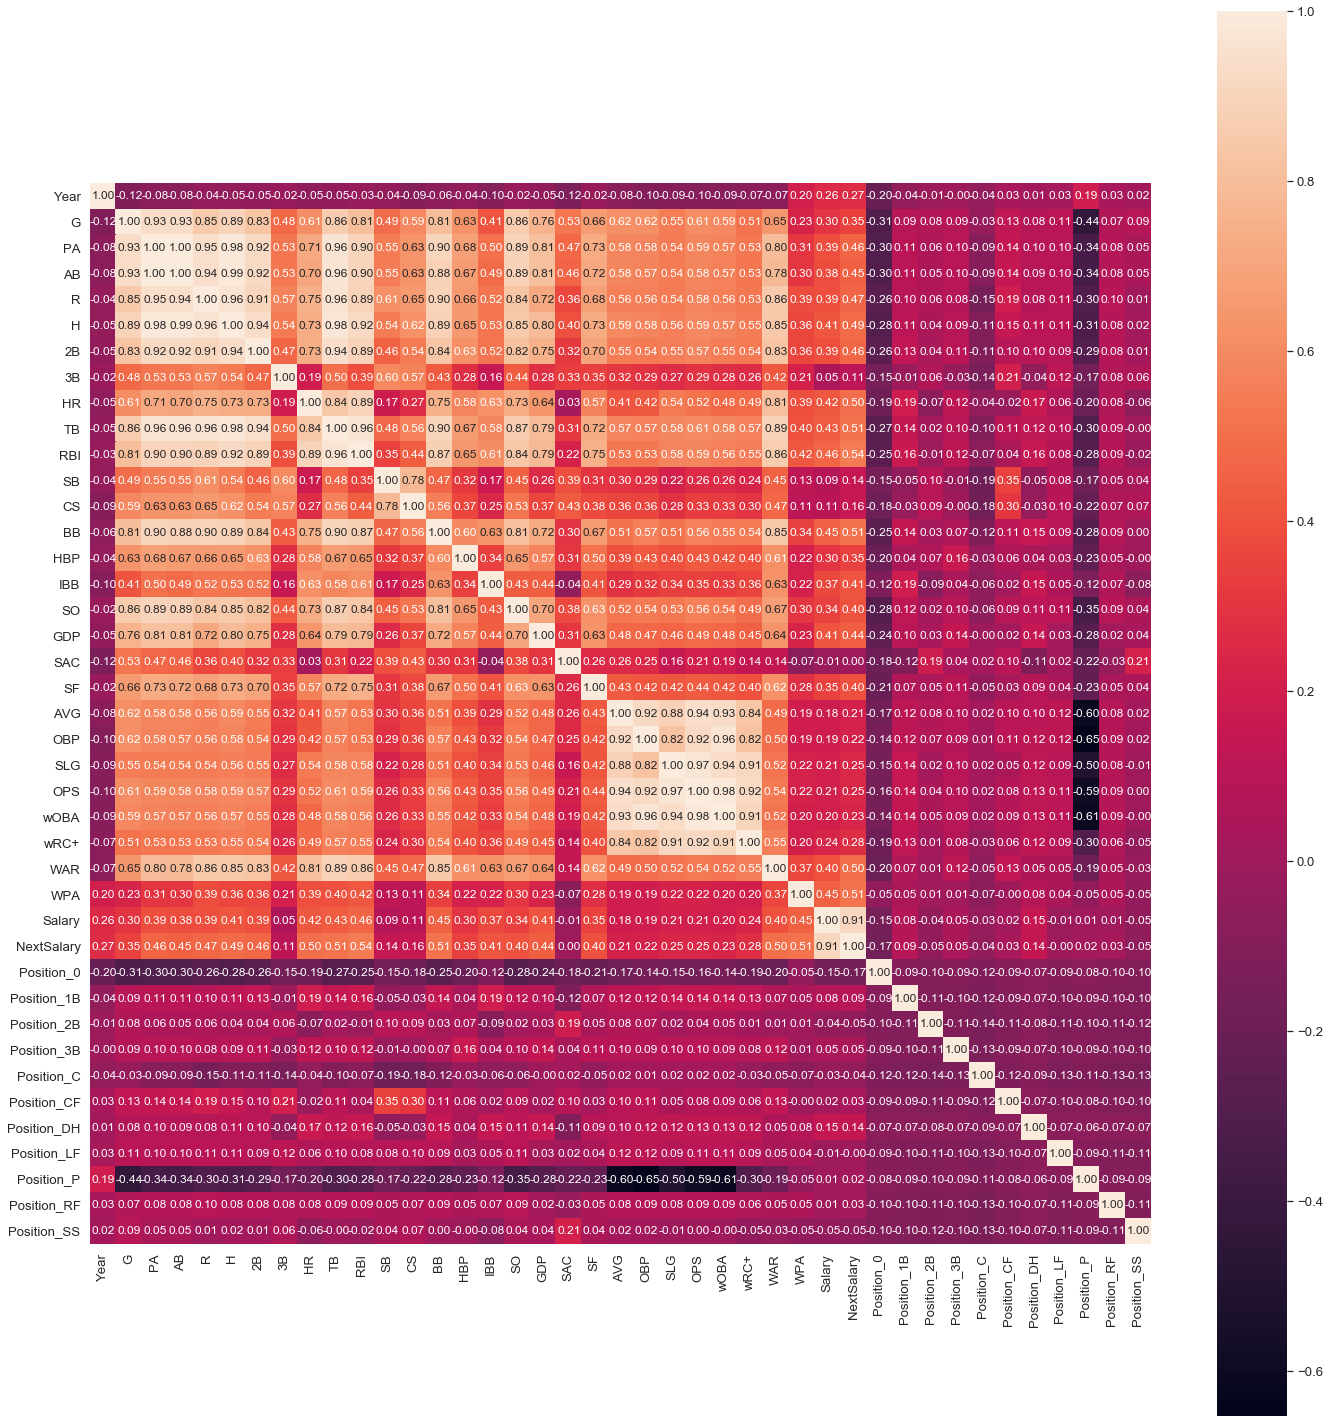

In [14]:
import seaborn as sns

# 피처간의 상관계수 행렬을 계산합니다.
corr = batter_df[batter_df.columns].corr(method='pearson')

# corr 행렬 히트맵을 시각화합니다.
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(20, 20))

sns.set(font_scale=1.2)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 12},
            yticklabels=batter_df.columns,
            xticklabels=batter_df.columns)

plt.tight_layout()
plt.show()

### Feature, Label 분리

In [15]:
X = batter_df[batter_df.columns.difference(['NextSalary'])]
y = batter_df['NextSalary']

### 다중공선성 확인 및 다중공선성이 높은 Feature 제거

Rep1. 2B, 3B, H, HR

Rep2. PA

Rep3. wOBA

Rep4. TB

Rep5. OPS

Rep6. AB

Rep7. R

Rep8. RBI

Rep9. SLG

Rep10. G

Rep11. OBP

    제거한 Feature: ['2B', '3B', 'H', 'HR', 'PA', 'wOBA', 'TB', 'OPS', 'AB', 'R', 'RBI', 'SLG', 'G', 'OBP']

In [16]:
X = X.drop(['2B', '3B', 'H', 'HR', 'PA', 'wOBA', 'TB', 'OPS', 'AB', 'R', 'RBI', 'SLG', 'G', 'OBP'], axis=1)
X.head()

,AVG,BB,CS,GDP,HBP,IBB,Position_0,Position_1B,Position_2B,Position_3B,...,Position_SS,SAC,SB,SF,SO,Salary,WAR,WPA,Year,wRC+
0,0.000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,8000,0.00,0.00,2007,0.0
1,0.221,13,0,1,2,0,0,0,0,0,...,1,2,0,0,28,2400,0.21,-0.11,2014,65.6
2,0.257,40,3,3,5,1,0,0,0,0,...,1,18,4,3,58,6500,0.11,-0.32,2015,66.4
3,0.158,8,0,5,2,0,0,0,0,0,...,1,4,0,1,30,6500,-0.69,-1.10,2016,10.5
4,0.214,8,1,1,1,0,0,0,1,0,...,0,0,1,0,19,6200,-0.18,-0.81,2017,44.1


In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
# 각 특성의 VIF 계수 출력
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,7.5,AVG
1,8.1,BB
2,3.1,CS
3,2.8,GDP
4,2.1,HBP
5,2.1,IBB
6,10944.5,Position_0
7,12277.4,Position_1B
8,15076.7,Position_2B
9,12435.7,Position_3B


### 특성 정리 후 특성 사이의 상관관계 분석

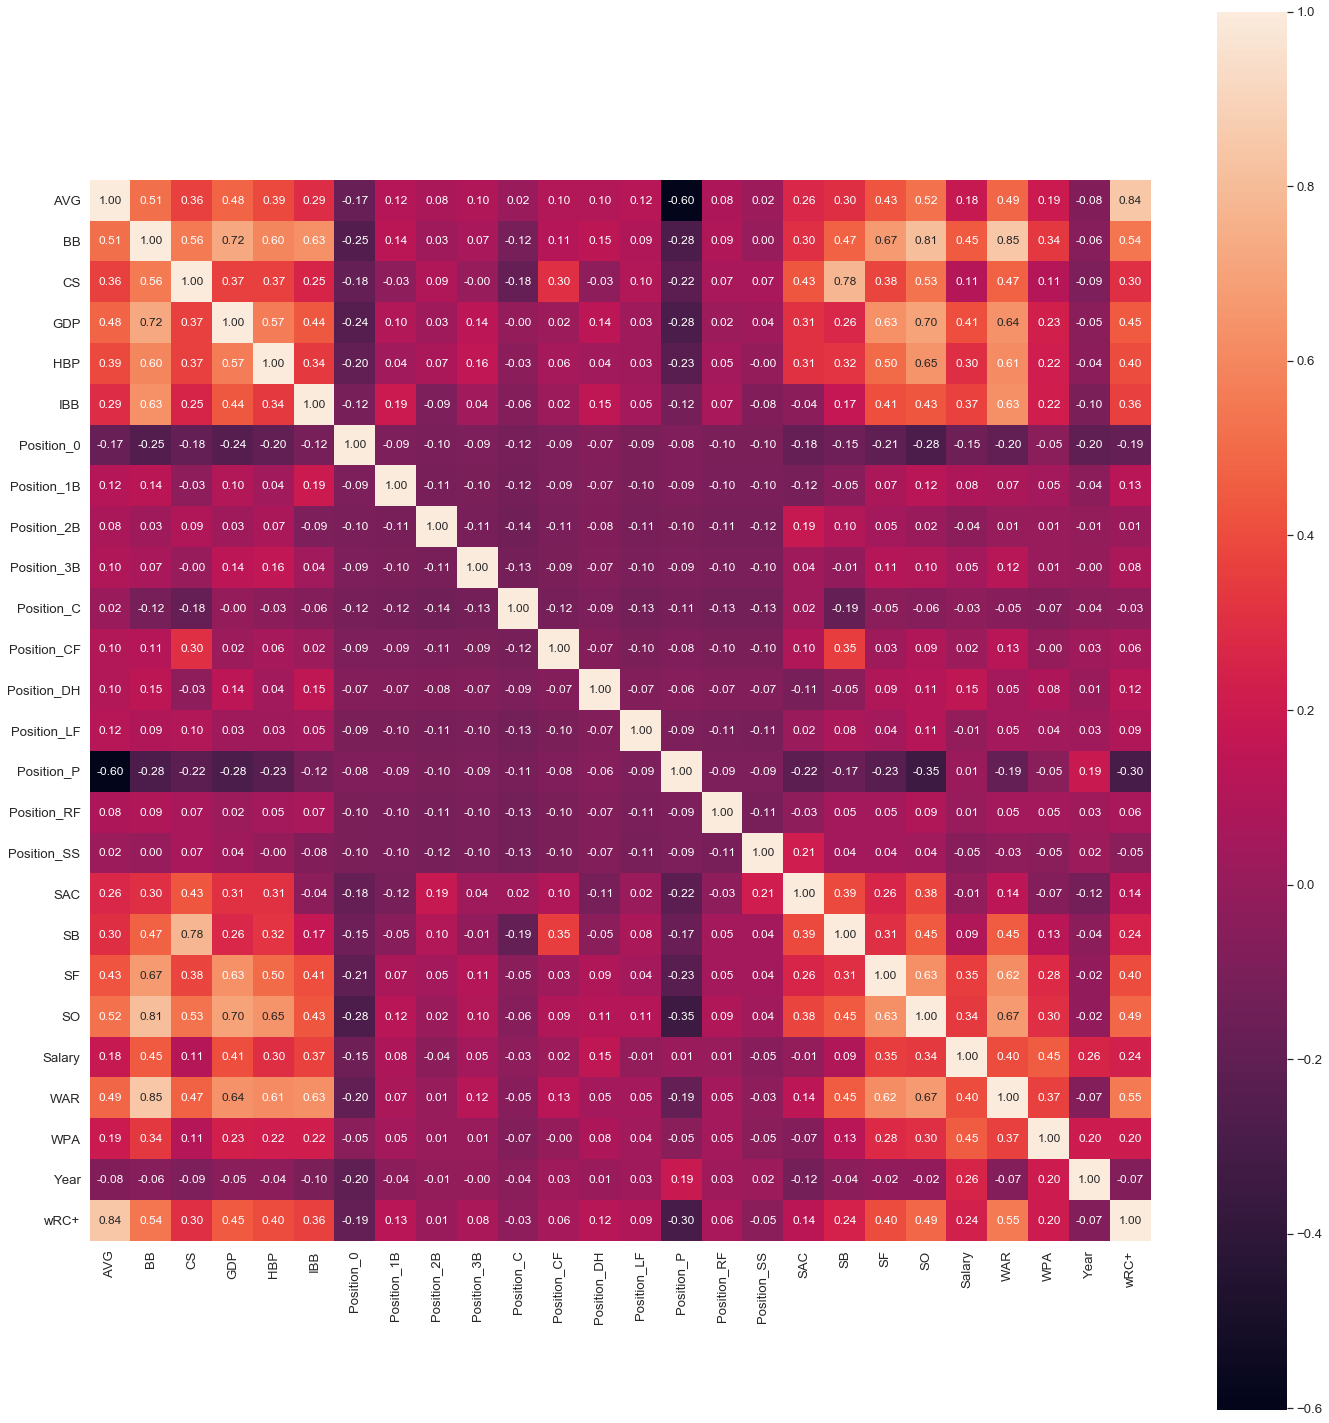

In [19]:
# 피처간의 상관계수 행렬을 계산합니다.
corr = X[X.columns].corr(method='pearson')

# corr 행렬 히트맵을 시각화합니다.
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(20, 20))
sns.set(font_scale=1.2)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 12},
            yticklabels=X.columns,
            xticklabels=X.columns)

plt.tight_layout()
plt.show()

### 학습 데이터와 테스트 데이터 분리

In [20]:
from sklearn.model_selection import train_test_split
print(X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

Index(['AVG', 'BB', 'CS', 'GDP', 'HBP', 'IBB', 'Position_0', 'Position_1B',
       'Position_2B', 'Position_3B', 'Position_C', 'Position_CF',
       'Position_DH', 'Position_LF', 'Position_P', 'Position_RF',
       'Position_SS', 'SAC', 'SB', 'SF', 'SO', 'Salary', 'WAR', 'WPA', 'Year',
       'wRC+'],
      dtype='object')


### 특성 단위 맞춰주기: 스케일링

독립적인 특성이라면 정규화를 수행하는 것이 유리함

In [34]:
# 균등한 비율로 정규화 (= MinMaxScaler)
X_max = X_train.max(axis=0)
X_min = X_train.min(axis=0)
X_train_minmax = (X_train - X_min) / (X_max - X_min)
X_test_minmax = (X_test - X_min) / (X_max - X_min)

# 정규분포 정규화(= StandardScaler)
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
X_train_std = (X_train - X_mean) / X_std
X_test_std = (X_test - X_mean) / X_std

<class 'pandas.core.series.Series'>


----

## 3. 회귀 분석 적용하기

### 다항회귀, Ridge, Lasso, Elastic net 비교

In [22]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# 다항 회귀
lin = LinearRegression()

# Ridge
ridge = Ridge(alpha=1e-4, random_state=12)

# Lasso
lasso = Lasso(alpha=1e-7, random_state=14)

# Enet
enet = ElasticNet(alpha=1e-7, l1_ratio=0.5, random_state=16)

### MinMax Scaling

In [32]:
lin_model_minmax = lin.fit(X_train_minmax, y_train)
ridge_model_minmax = ridge.fit(X_train_minmax, y_train)
lasso_model_minmax = lasso.fit(X_train_minmax, y_train)
enet_model_minmax = enet.fit(X_train_minmax, y_train)

# Linear-Minmax
lin_train_minmax_score = lin_model_minmax.score(X_train_minmax, y_train)
lin_test_minmax_score = lin_model_minmax.score(X_test_minmax, y_test)
print('Linear-Minmax:', lin_train_minmax_score, lin_test_minmax_score)

# Ridge-MinMax
ridge_train_minmax_score = ridge_model_minmax.score(X_train_minmax, y_train)
ridge_test_minmax_score = ridge_model_minmax.score(X_test_minmax, y_test)
print('Ridge-MinMax:', ridge_train_minmax_score, ridge_test_minmax_score)

# Lasso-MinMax
lasso_train_minmax_score = lasso_model_minmax.score(X_train_minmax, y_train)
lasso_test_minmax_score = lasso_model_minmax.score(X_test_minmax, y_test)
print('Lasso-MinMax:', lasso_train_minmax_score, lasso_test_minmax_score)

# Elastic net-MinMax
enet_train_minmax_score = enet_model_minmax.score(X_train_minmax, y_train)
enet_test_minmax_score = enet_model_minmax.score(X_test_minmax, y_test)
print('Elastic net-MinMax:', enet_train_minmax_score, enet_test_minmax_score)

<class 'sklearn.linear_model._base.LinearRegression'>
Linear-Minmax: 0.8630280494040177 0.8771866896442517
Ridge-MinMax: 0.8630280493046395 0.8771868427052608
Lasso-MinMax: 0.8630280494040177 0.8771866896596348
Elastic net-MinMax: 0.8630280492732754 0.8771868651631483


### Standard Scaling

In [66]:
lin_model_std = lin.fit(X_train_std, y_train)
ridge_model_std = ridge.fit(X_train_std, y_train)
lasso_model_std = lasso.fit(X_train_std, y_train)
enet_model_std = enet.fit(X_train_std, y_train)

# Linear-Std
lin_train_std_score = lin_model_std.score(X_train_std, y_train)
lin_test_std_score = lin_model_std.score(X_test_std, y_test)
print('Linear-Norm:', lin_train_std_score, lin_test_std_score)

# Ridge-Std
ridge_train_std_score = ridge_model_std.score(X_train_std, y_train)
ridge_test_std_score = ridge_model_std.score(X_test_std, y_test)
print('Ridge-Norm:', ridge_train_std_score, ridge_test_std_score)

# Lasso-Std
lasso_train_std_score = lasso_model_std.score(X_train_std, y_train)
lasso_test_std_score = lasso_model_std.score(X_test_std, y_test)
print('Lasso-Norm:', lasso_train_std_score, lasso_test_std_score)

# Elastic net-Std
enet_train_std_score = enet_model_std.score(X_train_std, y_train)
enet_test_std_score = enet_model_std.score(X_test_std, y_test)
print('Elastic net-Norm:', enet_train_std_score, enet_test_std_score)

Linear-Norm: 0.8630280494040177 0.8771866896442516
Ridge-Norm: 0.8630280494040155 0.8771866905306582
Lasso-Norm: 0.8630280494040177 0.8771866896470825
Elastic net-Norm: 0.8630280494040148 0.8771866906635724


선형 모델이랑 규제가 있는 모델이랑 가중치를 비교했을 때 차이나는 만큼이 해당 Feature가 규제당한 정도라고 할 수 있겠다.

In [72]:
lin_model_std.coef_

array([82.005307, 222.295280, -139.043357, -105.400754, 47.983971,
       173.132630, 78.396603, 145.550384, -289.977037, 16.841376,
       -6.534137, -194.736298, 176.778047, -174.804990, 536.754686,
       -48.138458, -107.980190, 377.288808, 81.616857, -56.793455,
       160.124614, 14497.622569, 2681.557231, 1671.146040, 940.831498,
       -245.086060])

In [71]:
ridge_model_std.coef_

array([82.005210, 222.296011, -139.043460, -105.400510, 47.984162,
       173.132837, 78.396589, 145.550323, -289.977060, 16.841382,
       -6.534084, -194.736260, 176.778031, -174.805051, 536.754757,
       -48.138516, -107.980195, 377.288621, 81.616946, -56.793344,
       160.124429, 14497.621548, 2681.556483, 1671.146283, 940.831660,
       -245.085886])

In [113]:
lasso_model_std.coef_

array([82.005305, 222.295279, -139.043357, -105.400754, 47.983971,
       173.132630, 73.694153, 140.713233, -295.197989, 11.938880,
       -12.503836, -199.484262, 173.423770, -179.844786, 532.228753,
       -53.310079, -113.259381, 377.288807, 81.616857, -56.793454,
       160.124614, 14497.622569, 2681.557231, 1671.146040, 940.831498,
       -245.086058])

In [114]:
enet_model_std.coef_

array([82.005195, 222.296119, -139.043475, -105.400474, 47.984190,
       173.132867, 73.694657, 140.713697, -295.197439, 11.939429,
       -12.503116, -199.483693, 173.424122, -179.844299, 532.229336,
       -53.309574, -113.258804, 377.288594, 81.616959, -56.793328,
       160.124401, 14497.621398, 2681.556373, 1671.146319, 940.831683,
       -245.085860])

좀 더 알아보기 쉽게 표현해보자

In [28]:
float_formatter = lambda x: "%.6f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
diff.shape

(26,)

막대 그래프로 알아보자

너무 비슷한데 규제가 걸렸다고 볼 수 있나..?

In [120]:
def plot_coef_each_column(columns, data, algorithm):
    plt.rcParams['figure.figsize'] = [40, 70]
    plt.suptitle('Coefficient Comparison')
    fig = plt.figure(1)
    w = 0.5
    index = np.arange(len(algorithm))
    
    # df의 column 개수 만큼의 subplot을 출력
    for i in range(len(columns)):
        ax = fig.add_subplot(8, 4, i+1)
        axes = plt.gca()
        feature = []
        for d in data:
            feature.append(d[i])
        y_min = min(feature)
        y_max = max(feature)
        y_bal = (y_max - y_min) / 2
        axes.set_ylim([y_min - y_bal, y_max + y_bal])
        plt.bar(range(len(feature)), feature, width=w)
        plt.xticks(index, algorithm)
        ax.set_title(columns[i])
    plt.show()

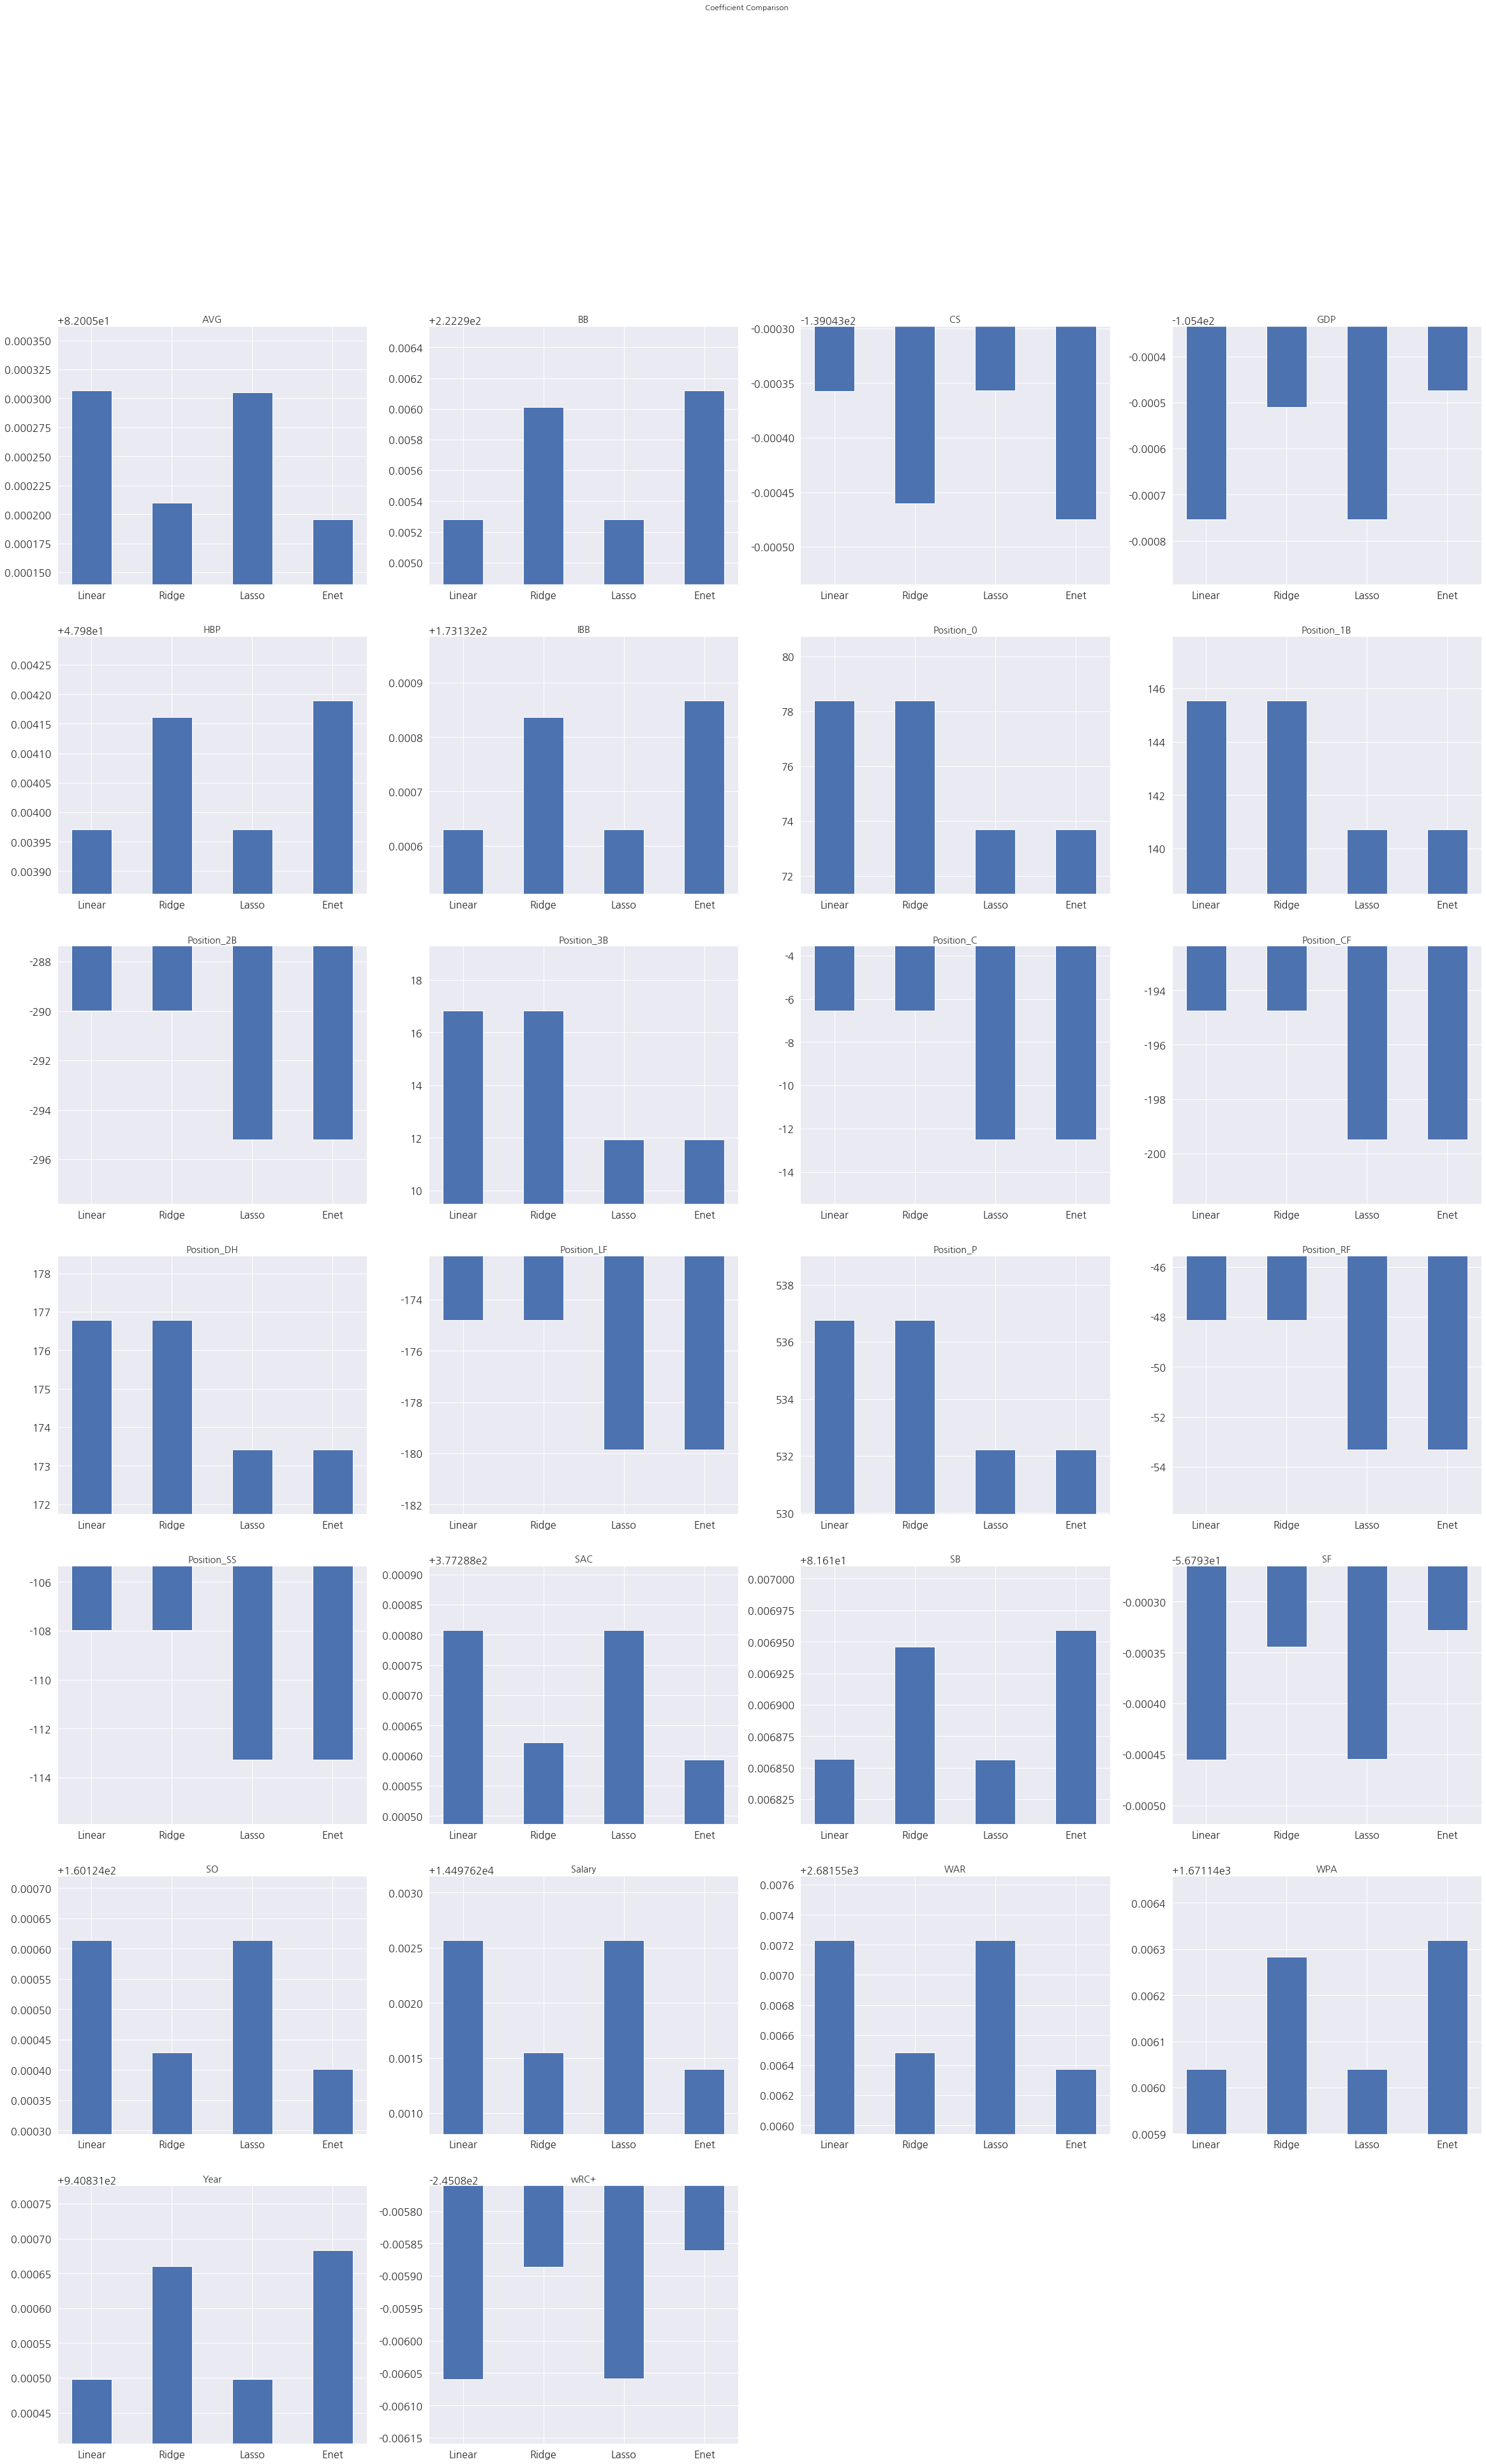

In [121]:
plot_coef_each_column(X.columns, [coef_linear, coef_ridge, coef_lasso, coef_enet], ['Linear', 'Ridge', 'Lasso', 'Enet'])

### 결론: 시간의 흐름에 따라 변화하는 데이터를 예측할 때는 예측하고자 하는 Feature를 같이 학습했을 때 정확도가 높아진다